In [1]:
!unzip '/content/drive/MyDrive/Computer_vision/Datasets/Fruits Classification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Classification/train/Grape/Grape (196).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1960).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1961).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1962).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1963).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1964).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1965).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1966).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1967).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1968).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1969).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (197).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1970).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1971).jpeg  
  inflating: 

In [2]:
import torch
import torch.nn as nn
from torchvision.models.resnet import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torch.optim as optim

## Load weights and transforms

In [3]:
weights = ResNet50_Weights.IMAGENET1K_V1
transforms = weights.transforms()
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

## Load the dataset

In [7]:
train_dir =  '/content/Fruits Classification/train'
test_dir = '/content/Fruits Classification/valid'

train_dataset = datasets.ImageFolder(train_dir, transform=transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
print(train_loader.dataset.class_to_idx)
print(test_loader.dataset.class_to_idx)

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}
{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


In [23]:
train_loader.dataset.classes

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

## Load the pretrained model and transfer it

In [4]:
resnet_model = resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 126MB/s]


In [13]:
resnet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
# Print the total no of layer
len(list(resnet_model.named_parameters()))

161

In [8]:
resnet_model.fc

Linear(in_features=2048, out_features=1000, bias=True)

### Freeze the all layers

In [5]:
for param in resnet_model.parameters():
  param.requires_grad = False

In [25]:
for name, param in resnet_model.named_parameters():
  print(f'{name}: {param.requires_grad}')

conv1.weight: False
bn1.weight: False
bn1.bias: False
layer1.0.conv1.weight: False
layer1.0.bn1.weight: False
layer1.0.bn1.bias: False
layer1.0.conv2.weight: False
layer1.0.bn2.weight: False
layer1.0.bn2.bias: False
layer1.0.conv3.weight: False
layer1.0.bn3.weight: False
layer1.0.bn3.bias: False
layer1.0.downsample.0.weight: False
layer1.0.downsample.1.weight: False
layer1.0.downsample.1.bias: False
layer1.1.conv1.weight: False
layer1.1.bn1.weight: False
layer1.1.bn1.bias: False
layer1.1.conv2.weight: False
layer1.1.bn2.weight: False
layer1.1.bn2.bias: False
layer1.1.conv3.weight: False
layer1.1.bn3.weight: False
layer1.1.bn3.bias: False
layer1.2.conv1.weight: False
layer1.2.bn1.weight: False
layer1.2.bn1.bias: False
layer1.2.conv2.weight: False
layer1.2.bn2.weight: False
layer1.2.bn2.bias: False
layer1.2.conv3.weight: False
layer1.2.bn3.weight: False
layer1.2.bn3.bias: False
layer2.0.conv1.weight: False
layer2.0.bn1.weight: False
layer2.0.bn1.bias: False
layer2.0.conv2.weight: False
l

### Modify the fully connected layer

In [8]:
in_features = resnet_model.fc.in_features
out_features = len(train_loader.dataset.classes)

resnet_model.fc = nn.Linear(in_features, out_features)
resnet_model.fc

Linear(in_features=2048, out_features=5, bias=True)

## Define Loss function and optimizers

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [12]:
criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)
resnet_model = resnet_model.to(device)

## Train loop and evaluation

In [13]:
# Training Loop
epochs = 5

for epoch in range(epochs):
  running_loss = 0.0
  resnet_model.train()

  for images, targets in train_loader:
    images, targets = images.to(device), targets.to(device)

    optimizer.zero_grad()
    outputs = resnet_model(images)
    loss = criteria(outputs, targets)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  t_loss = running_loss / len(train_loader)
  print(f'Epochs [{epoch + 1}/{epochs}], loss: {t_loss}')

path = f'/content/drive/MyDrive/Computer_vision/model/resnet50-e{epochs}.pth'
torch.save({
    'epochs': epochs,
    'classes': train_loader.dataset.classes,
    'model_state_dict': resnet_model.state_dict()
}, path)
print(f'\nModel save successfully at {path}')

Epochs [1/5], loss: 0.6454025032488924
Epochs [2/5], loss: 0.3837500670434613
Epochs [3/5], loss: 0.35349927891634014
Epochs [4/5], loss: 0.3154740742358722
Epochs [5/5], loss: 0.31482392275019694

Model save successfully at /content/drive/MyDrive/Computer_vision/model/resnet50-e5.pth


In [14]:
# Evaluation of model
corrects, totals = 0, 0
resnet_model.eval()

for images, targets in test_loader:
  images, targets = images.to(device), targets.to(device)

  with torch.no_grad():
    outputs = resnet_model(images)
  labels = torch.argmax(outputs, dim=1)
  totals += labels.size(0)
  corrects += (labels==targets).sum().item()
acc = 100 * corrects / totals
print(f'Model accuracy on validation: {acc:.2f}%')

Model accuracy on validation: 88.00%


## Loaded the save model

In [10]:
model_path = '/content/drive/MyDrive/Computer_vision/model/resnet50-e5.pth'
checkpoint = torch.load(model_path, map_location=device)

classes = checkpoint['classes']
state_dict = checkpoint['model_state_dict']
resnet_model.load_state_dict(state_dict)
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Model Inferencing

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
def preprocess(image_path, transforms):
  image = Image.open(image_path).convert('RGB')
  image = transforms(image).unsqueeze(0)

  return image

In [25]:
def predict(img, model):
  model.eval()

  with torch.no_grad():
    output = model(img)
  probabilities = nn.functional.softmax(output[0], dim=0)
  (values, ids) = torch.topk(probabilities, 5)

  return values, ids

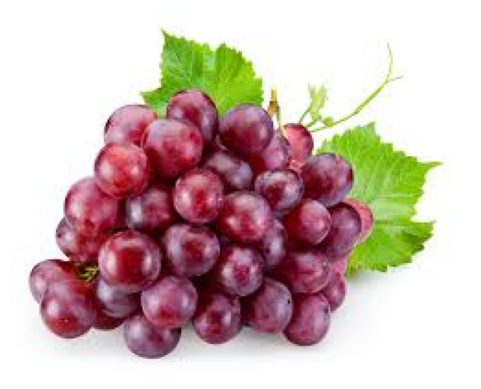

Grape: 0.99
Strawberry: 0.00
Apple: 0.00
Mango: 0.00
Banana: 0.00


In [29]:
image_path = '/content/download.jpg'
image = preprocess(image_path, transforms)

values, ids = predict(image, resnet_model)

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

for value, id in zip(values, ids):
  print(f'{classes[id]}: {value:.2f}')